In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

In [2]:
xls = pd.ExcelFile('../../../data/raw/partner_i/Dados Históricos - partner_i.xlsx', engine='openpyxl')

In [3]:
xls.sheet_names

['Descrição dados cimento',
 'Descrição dados clinquer',
 'Clinquer 2',
 'Clinquer 1',
 'CPIIE40',
 'CPIIF40']

In [4]:
df_desc_clinker = pd.read_excel(xls, 'Descrição dados clinquer')

In [5]:
df_desc_clinker

,Ensaio,Unidade,Descrição
0,F,%,% F via FRX
1,C3S,%,% alita via cálculo Bogue
2,C3A,%,% aluminato de cálcio via cálculo Bogue
3,CAOL,%,% CaO livre
4,K2O,%,% K2O via FRX
5,RSA,%,Relação enxofre álcalis
6,FSC,admensional,"fator de saturação de cálcio (CaO/(2,8*SiO2+1,..."
7,CAOL DRX,%,% CaOlivre via DRX
8,ALITA,%,% alita via DRX
9,ALITA M1,%,% alita M1 via DRX


# Exploratory Data Analyses - EDA - Clinker 1


<h2>Shape, feature information and some samples</h2>

In [6]:
df = pd.read_excel(xls, 'Clinquer 1')

In [7]:
df.shape

(1701, 34)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    1701 non-null   datetime64[ns]
 1   F            1701 non-null   float64       
 2   C3S          1701 non-null   float64       
 3   C3A          1701 non-null   float64       
 4   CAOL         1527 non-null   object        
 5   K2O          1527 non-null   object        
 6   RSA          1527 non-null   object        
 7   FSC          1527 non-null   object        
 8   CAOL DRX     1527 non-null   object        
 9   ALITA        1527 non-null   object        
 10  ALITA M1     1527 non-null   object        
 11  ALITA M3     1527 non-null   object        
 12  C3A TOTAL    1583 non-null   object        
 13  C3A ORTO     1527 non-null   object        
 14  C3A CÚBICO   1701 non-null   float64       
 15  MS           1527 non-null   object        
 16  MA    

In [9]:
df.head()

,Data/Hora,F,C3S,C3A,CAOL,K2O,RSA,FSC,CAOL DRX,ALITA,...,ARCANITA,NA2O,C2S,BELITA,BELITA BETA,BELITA ALFA,BELITA GAMA,C4AF,FERRITA,EQALC
0,2019-03-30 07:00:00,-0.05,64.849998,8.10,3.47,1.01,1.85,105.2,3.01,64.29,...,0.14,0.25,5.41,12.83,Pt Created,Pt Created,Pt Created,8.31,6.55,0.91
1,2019-03-30 11:00:00,-0.05,64.849998,8.10,3.47,1.01,1.85,105.2,3.01,64.29,...,0.14,0.25,5.41,12.83,Pt Created,Pt Created,Pt Created,8.31,6.55,0.91
2,2019-03-30 15:00:00,-0.11,71.919998,7.72,0.96,0.59,2.96,103.07,0.96,73.81,...,0,0.17,1.36,5.64,Pt Created,Pt Created,Pt Created,9.37,8.36,0.56
3,2019-03-30 19:00:00,-0.04,66.309998,8.20,1.91,1.02,1.94,102.49,1.91,75.79,...,0,0.29,5.65,4.43,Pt Created,Pt Created,Pt Created,8.7,7.61,0.96
4,2019-03-30 23:00:00,-0.04,66.309998,8.20,1.91,1.02,1.94,102.49,1.91,75.79,...,0,0.29,5.65,4.43,Pt Created,Pt Created,Pt Created,8.7,7.61,0.96


In [10]:
df.tail()

,Data/Hora,F,C3S,C3A,CAOL,K2O,RSA,FSC,CAOL DRX,ALITA,...,ARCANITA,NA2O,C2S,BELITA,BELITA BETA,BELITA ALFA,BELITA GAMA,C4AF,FERRITA,EQALC
1696,2020-10-18 03:00:00,0.01,70.566147,9.02610,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1697,2020-10-18 07:00:00,0.06,63.267948,9.21894,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1698,2020-10-18 11:00:00,0.02,64.913971,9.32718,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1699,2020-10-18 15:00:00,0.02,64.913971,9.32718,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1700,2020-10-18 19:00:00,0.06,65.411034,9.38914,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2>1. Structure Investigation</h2>

In [11]:
df.dtypes.value_counts()

object            29
float64            4
datetime64[ns]     1
dtype: int64

<h3>1.1 Structure of numerical features</h3>

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
F,1701.0,0.031212,0.099506,-0.25,-0.050000,0.010000,0.090000,0.380000
C3S,1701.0,65.994335,4.026738,47.50,63.229999,65.900002,68.900002,80.150002
C3A,1701.0,8.670721,0.490975,7.00,8.350000,8.648760,8.970000,10.190000
C3A CÚBICO,1701.0,5.904497,1.875194,2.20,4.250000,5.740000,7.410000,11.140000


<h3>1.2 Structure of categorical features</h3>

In [13]:
df.describe(exclude='number').T

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last
Data/Hora,1701,1701,2020-09-16 23:00:00,1,2019-03-30 07:00:00,2020-10-18 19:00:00
CAOL,1527,360,1.34,15,NaT,NaT
K2O,1527,100,0.99,59,NaT,NaT
RSA,1527,489,1.6,66,NaT,NaT
FSC,1527,812,98.57,23,NaT,NaT
CAOL DRX,1527,397,0.98,14,NaT,NaT
ALITA,1527,753,71.03,11,NaT,NaT
ALITA M1,1527,870,7.13,151,NaT,NaT
ALITA M3,1527,1133,59.17,5,NaT,NaT
C3A TOTAL,1583,493,7.76,305,NaT,NaT


In [14]:
object_features = df.select_dtypes(include='object').columns

In [15]:
for feature in object_features:
    mask = df[feature].apply(lambda x : type(x)) == str
    print(df[feature][mask].unique()[0])

Resize to show all values
Resize to show all values
Resize to show all values
Resize to show all values
Resize to show all values
Resize to show all values
Resize to show all values
Resize to show all values
Pt Created
Resize to show all values
Resize to show all values
Resize to show all values
Resize to show all values
Resize to show all values
Resize to show all values
Resize to show all values
Resize to show all values
Resize to show all values
Resize to show all values
Resize to show all values
Resize to show all values
Resize to show all values
Resize to show all values
Pt Created
Pt Created
Pt Created
Resize to show all values
Resize to show all values
Resize to show all values


<h3>Handling non numeric values</h3>
Here we convert non numeric entries to nan. The aim is to be able to make a numerical
analysis without having any issue with these values.

In [16]:
# Here we convert every entry of type str to nan to perform a numeric analyses in the data
mask = df.applymap(lambda x : type(x)) == str
df = df.where(~mask, other=np.nan)
df[object_features] = df[object_features].astype('float64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    1701 non-null   datetime64[ns]
 1   F            1701 non-null   float64       
 2   C3S          1701 non-null   float64       
 3   C3A          1701 non-null   float64       
 4   CAOL         1526 non-null   float64       
 5   K2O          1526 non-null   float64       
 6   RSA          1526 non-null   float64       
 7   FSC          1526 non-null   float64       
 8   CAOL DRX     1526 non-null   float64       
 9   ALITA        1526 non-null   float64       
 10  ALITA M1     1526 non-null   float64       
 11  ALITA M3     1526 non-null   float64       
 12  C3A TOTAL    1556 non-null   float64       
 13  C3A ORTO     1526 non-null   float64       
 14  C3A CÚBICO   1701 non-null   float64       
 15  MS           1526 non-null   float64       
 16  MA    

In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
F,1701.0,0.031212,0.099506,-0.250000,-0.050000,0.010000,0.090000,0.380000
C3S,1701.0,65.994335,4.026738,47.500000,63.229999,65.900002,68.900002,80.150002
C3A,1701.0,8.670721,0.490975,7.000000,8.350000,8.648760,8.970000,10.190000
CAOL,1526.0,1.681612,1.079271,0.130000,0.860000,1.400000,2.260000,7.120000
K2O,1526.0,1.019799,0.167451,0.390000,0.910000,0.990000,1.120000,1.960000
RSA,1526.0,1.623064,0.166614,0.840951,1.520000,1.610000,1.700000,2.960000
FSC,1526.0,101.817494,2.947830,93.820000,99.739998,102.094997,103.660004,116.779999
CAOL DRX,1526.0,1.730550,1.143020,0.000000,0.842500,1.440000,2.410000,7.120000
ALITA,1526.0,70.679823,3.073727,47.490002,69.072500,71.129997,72.669998,77.709999
ALITA M1,1526.0,16.594725,13.956474,0.000000,7.000000,12.065000,25.462500,61.450001


<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<AxesSubplot:title={'center':'Unique Values per feature'}>

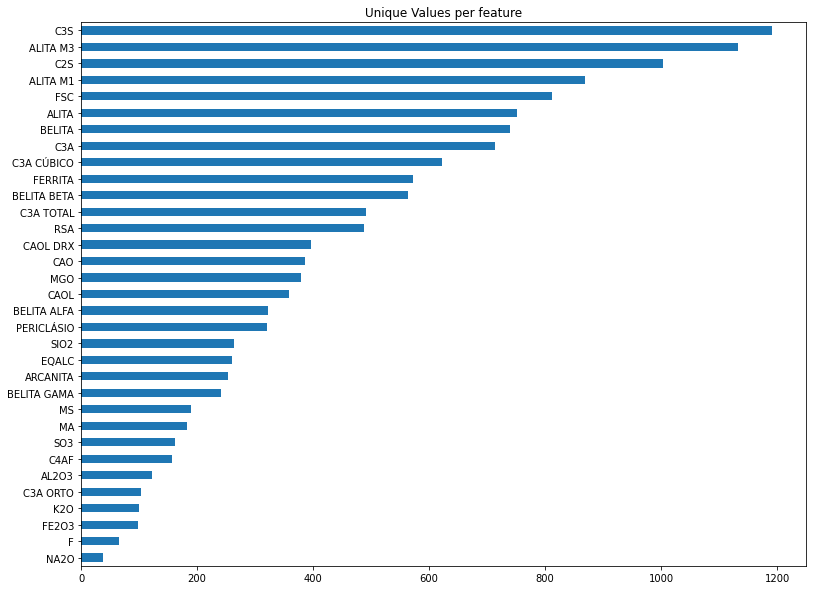

In [19]:
unique_values = df.select_dtypes(include='number').nunique().sort_values()

unique_values.plot.barh(logy=False, figsize=(13, 10), title='Unique Values per feature')

(array([0]), [Text(0, 0, 'Data/Hora')])

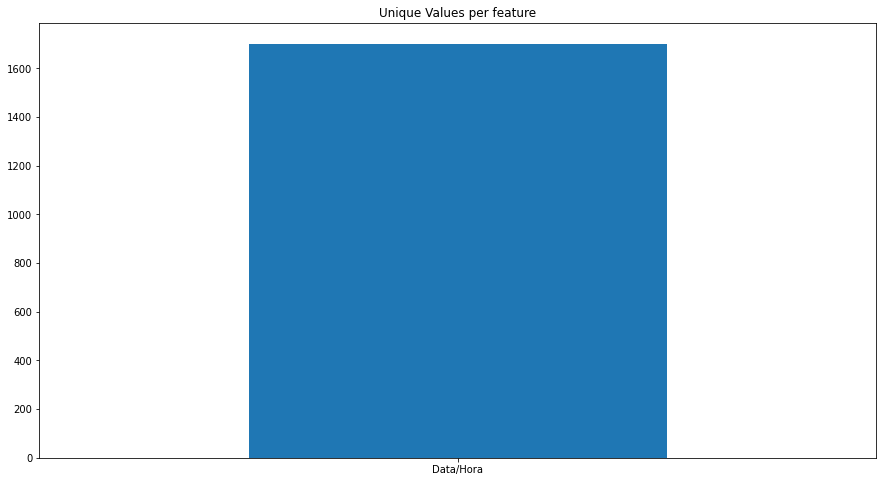

In [20]:
unique_values = df.select_dtypes(exclude='number').nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title='Unique Values per feature')

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [21]:
print("There are", df.isna().any().sum(), "variables with missing values from a total of", df.shape[1])

There are 29 variables with missing values from a total of 34


In [22]:
print("There are a total of ", df.isna().sum().sum(), "missing values.")

There are a total of  6076 missing values.


In [23]:
df.isna().sum()

Data/Hora        0
F                0
C3S              0
C3A              0
CAOL           175
K2O            175
RSA            175
FSC            175
CAOL DRX       175
ALITA          175
ALITA M1       175
ALITA M3       175
C3A TOTAL      145
C3A ORTO       175
C3A CÚBICO       0
MS             175
MA             175
SO3            175
CAO            175
SIO2           175
AL2O3          175
FE2O3          175
MGO            175
PERICLÁSIO     175
ARCANITA       214
NA2O           175
C2S            175
BELITA         175
BELITA BETA    506
BELITA ALFA    505
BELITA GAMA    506
C4AF           175
FERRITA        175
EQALC          175
dtype: int64

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of quantity of missing values')

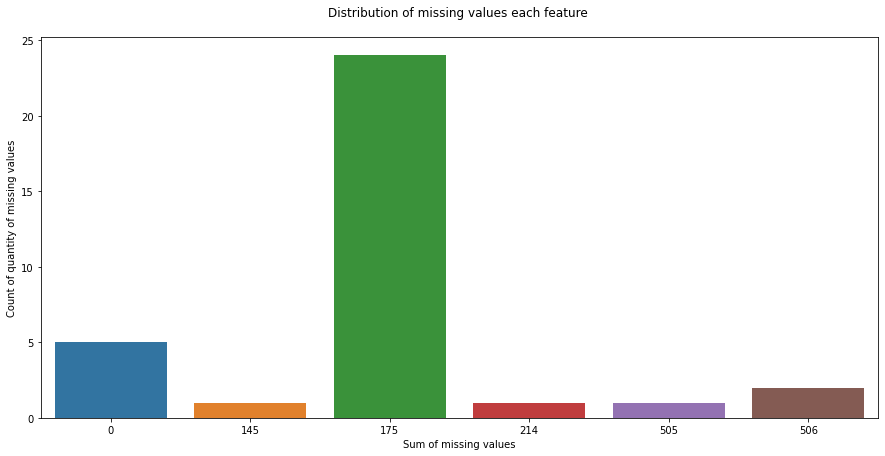

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(df.isna().sum())
plt.title('Distribution of missing values each feature \n')
plt.xlabel('Sum of missing values')
plt.ylabel('Count of quantity of missing values')

<h3>2.3. Percentage of zeros</h3>

<BarContainer object of 34 artists>

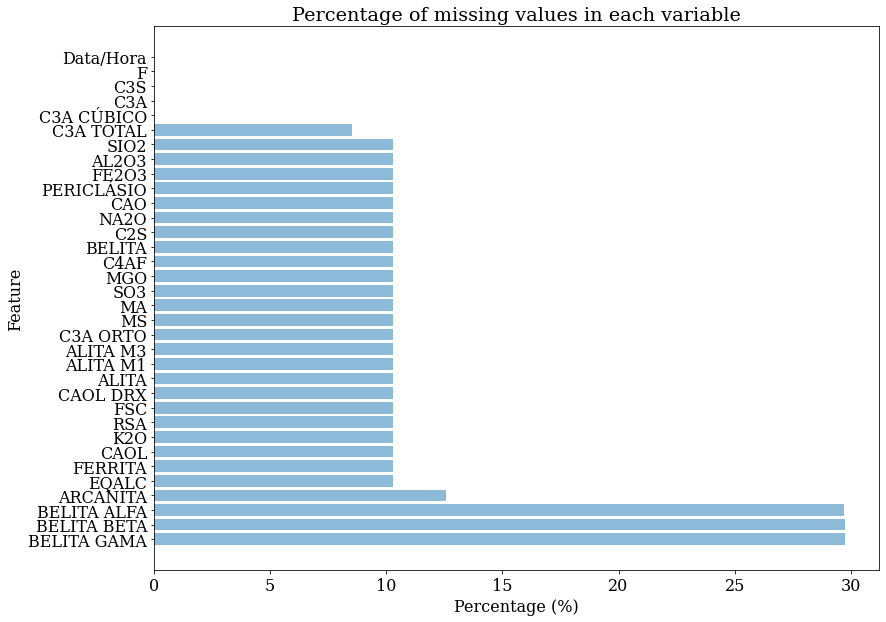

In [25]:
miss_perc = df.isnull().sum()/df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc('font', family='serif', size=16)
plt.figure(figsize=(13,10))
plt.title('Percentage of missing values in each variable')
plt.xlabel('Percentage (%)')
plt.ylabel('Feature')
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [26]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


In [27]:
n_duplicates = df.drop('Data/Hora', axis=1).duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 204 duplicates samples.


<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

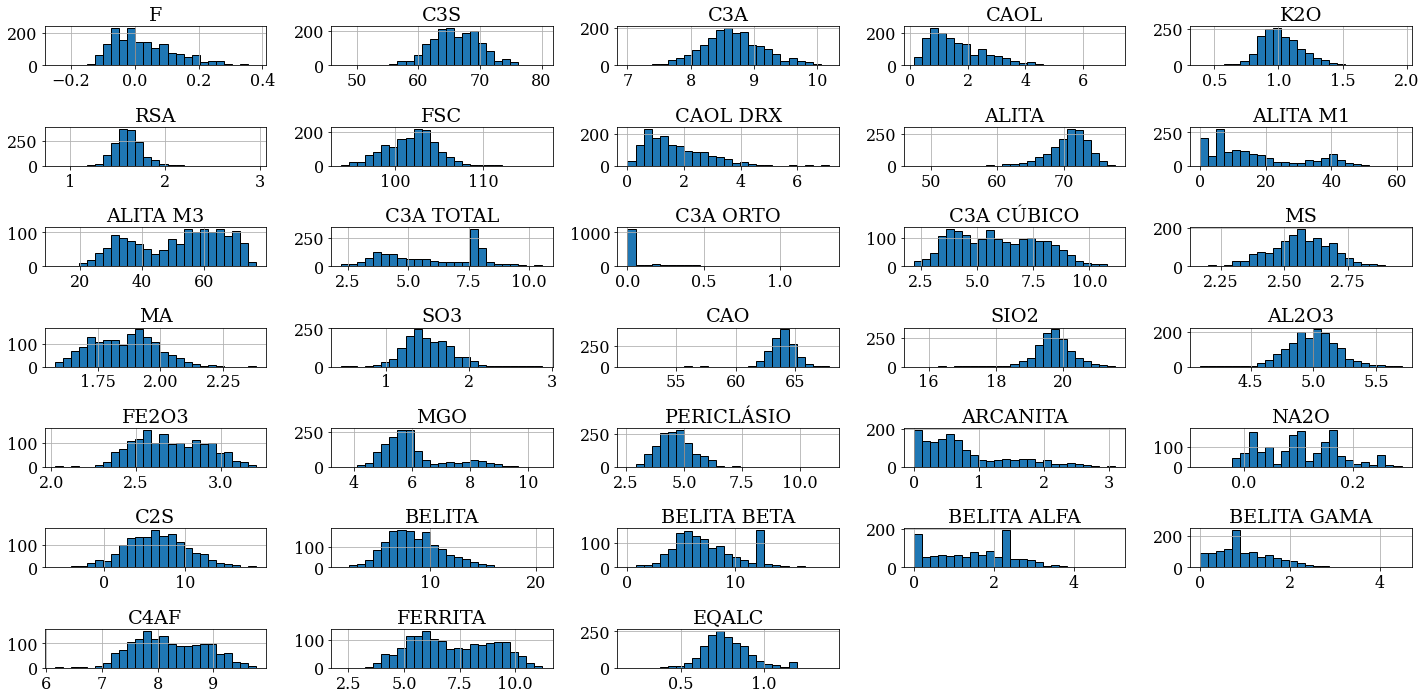

In [28]:
df.hist(bins=25, figsize=(20, 10), layout=(-1, 5), edgecolor='black')
plt.tight_layout()

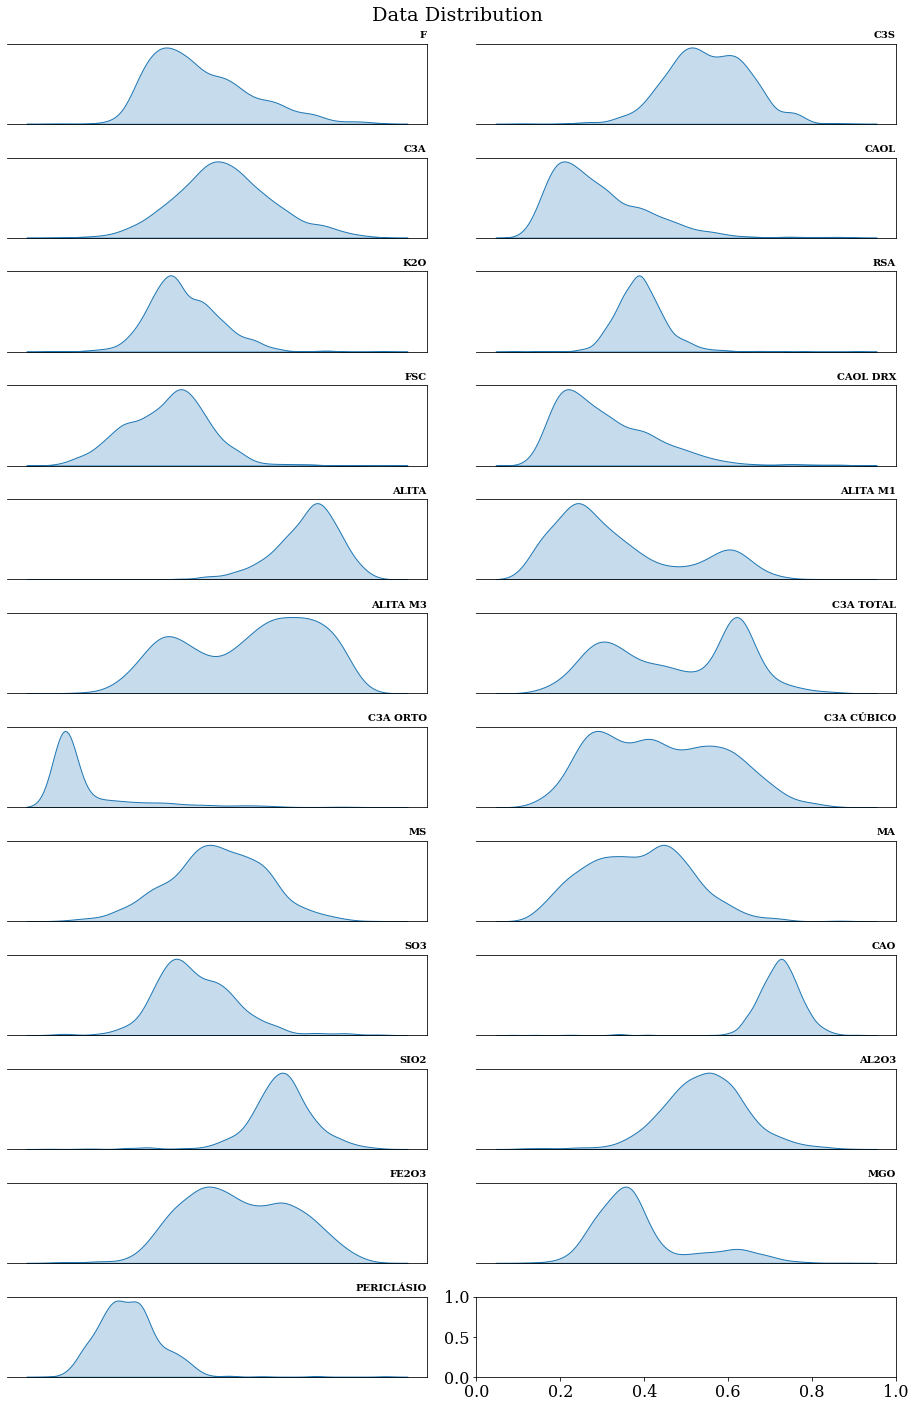

In [29]:
fig, axes = plt.subplots(12, 2,figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include='float64').columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette = ["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    ax.set_title(columns[i], loc='right', weight='bold', fontsize=10)
    if i+1 == 23:
        break

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle('Data Distribution')

fig.tight_layout()
plt.show()

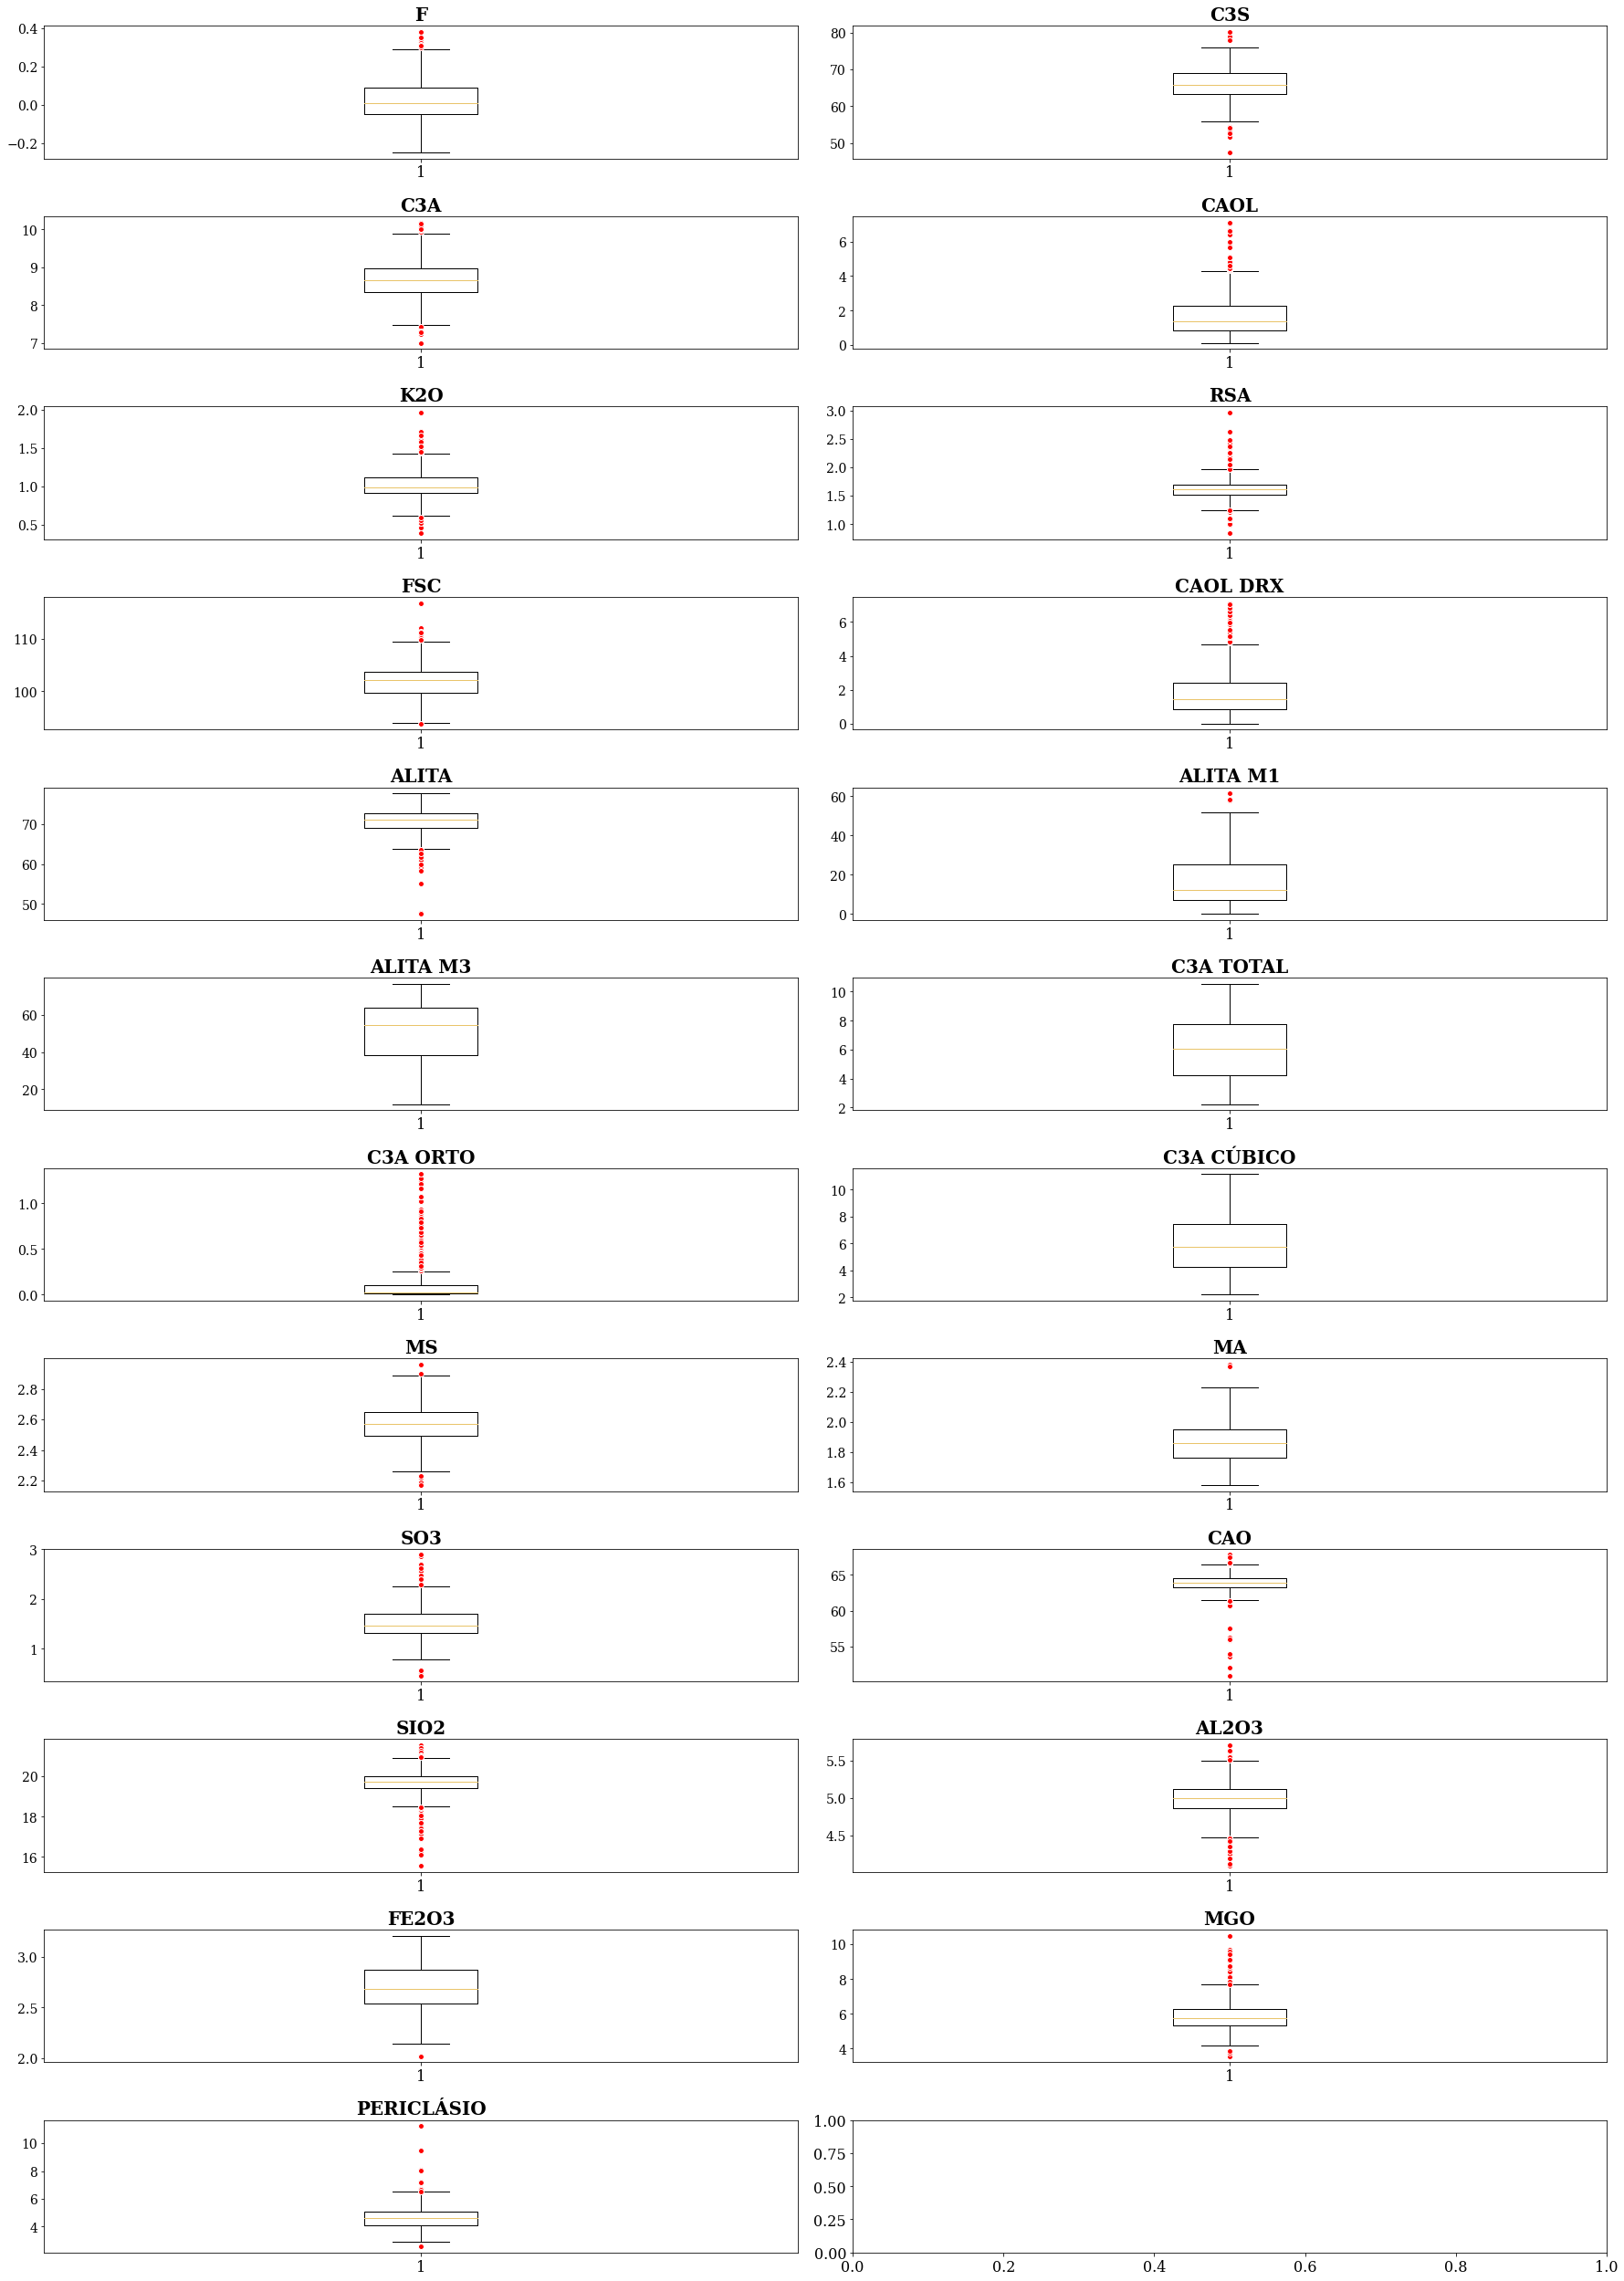

In [30]:
#Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include='float64').columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(12, 2, figsize=(25,35))

# fig, axes = plt.subplots(11, 3,figsize=(13, 20))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    if i + 1 == 23:
        break

plt.tight_layout()

<h3>3.3. Feature Relationship</h3>

<h3>Correlation Matrix heatmap</h3>

<AxesSubplot:>

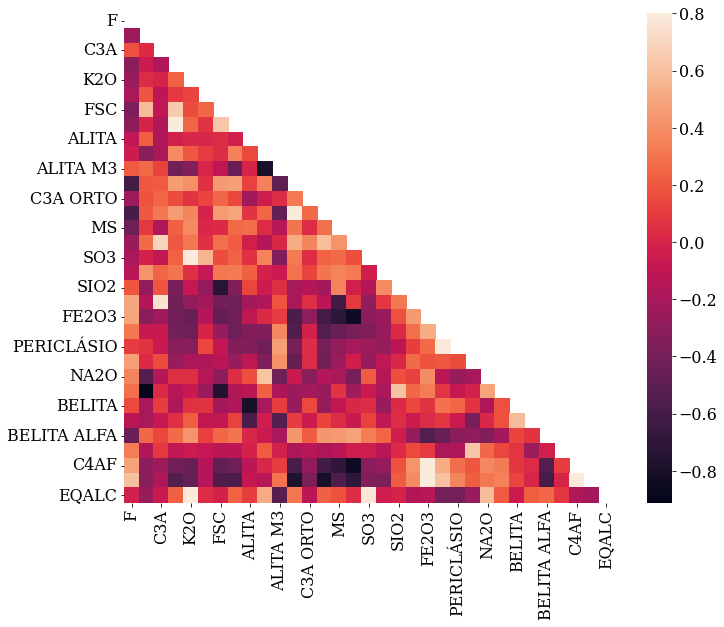

In [31]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, mask=mask, vmax=.8, square=True)

<AxesSubplot:>

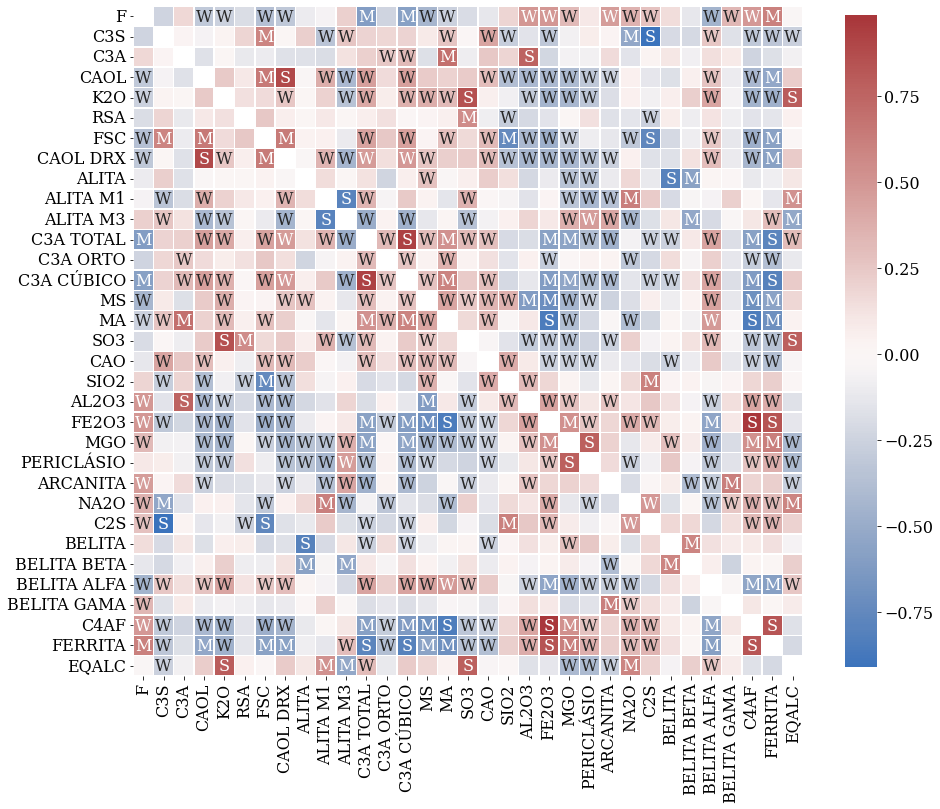

In [32]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(
    np.abs(df_corr) > 0.75,
    "S",
    np.where(np.abs(df_corr) > 0.5, "M", np.where(np.abs(df_corr) > 0.25, "W", "")),
)

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

<AxesSubplot:>

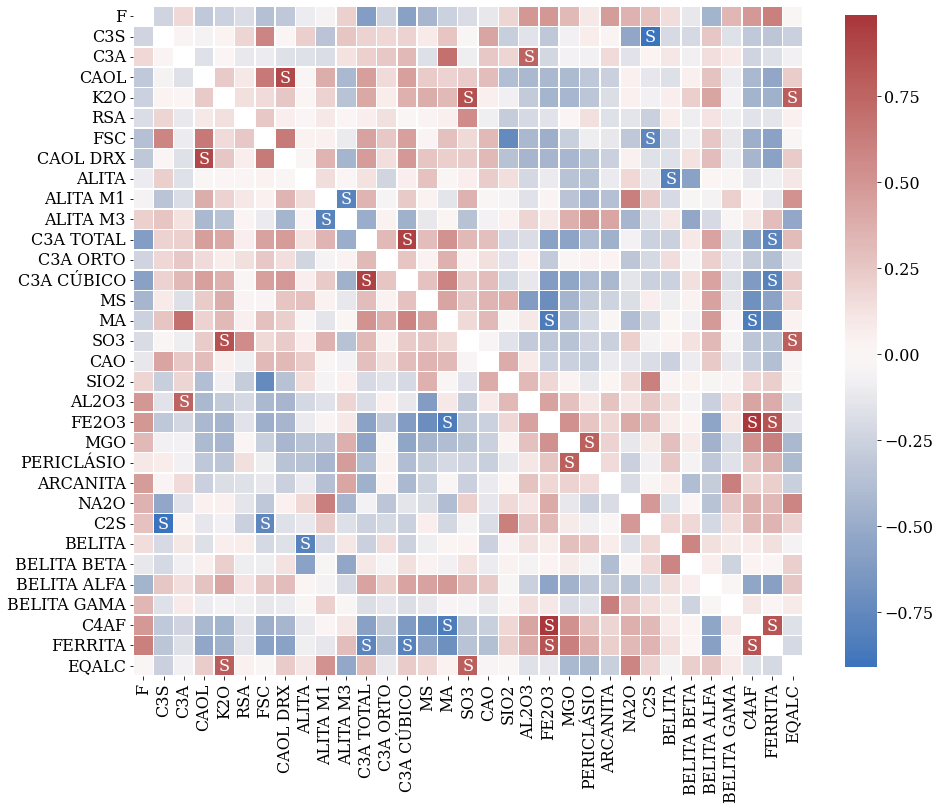

In [33]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr) > 0.75, "S", "")


# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

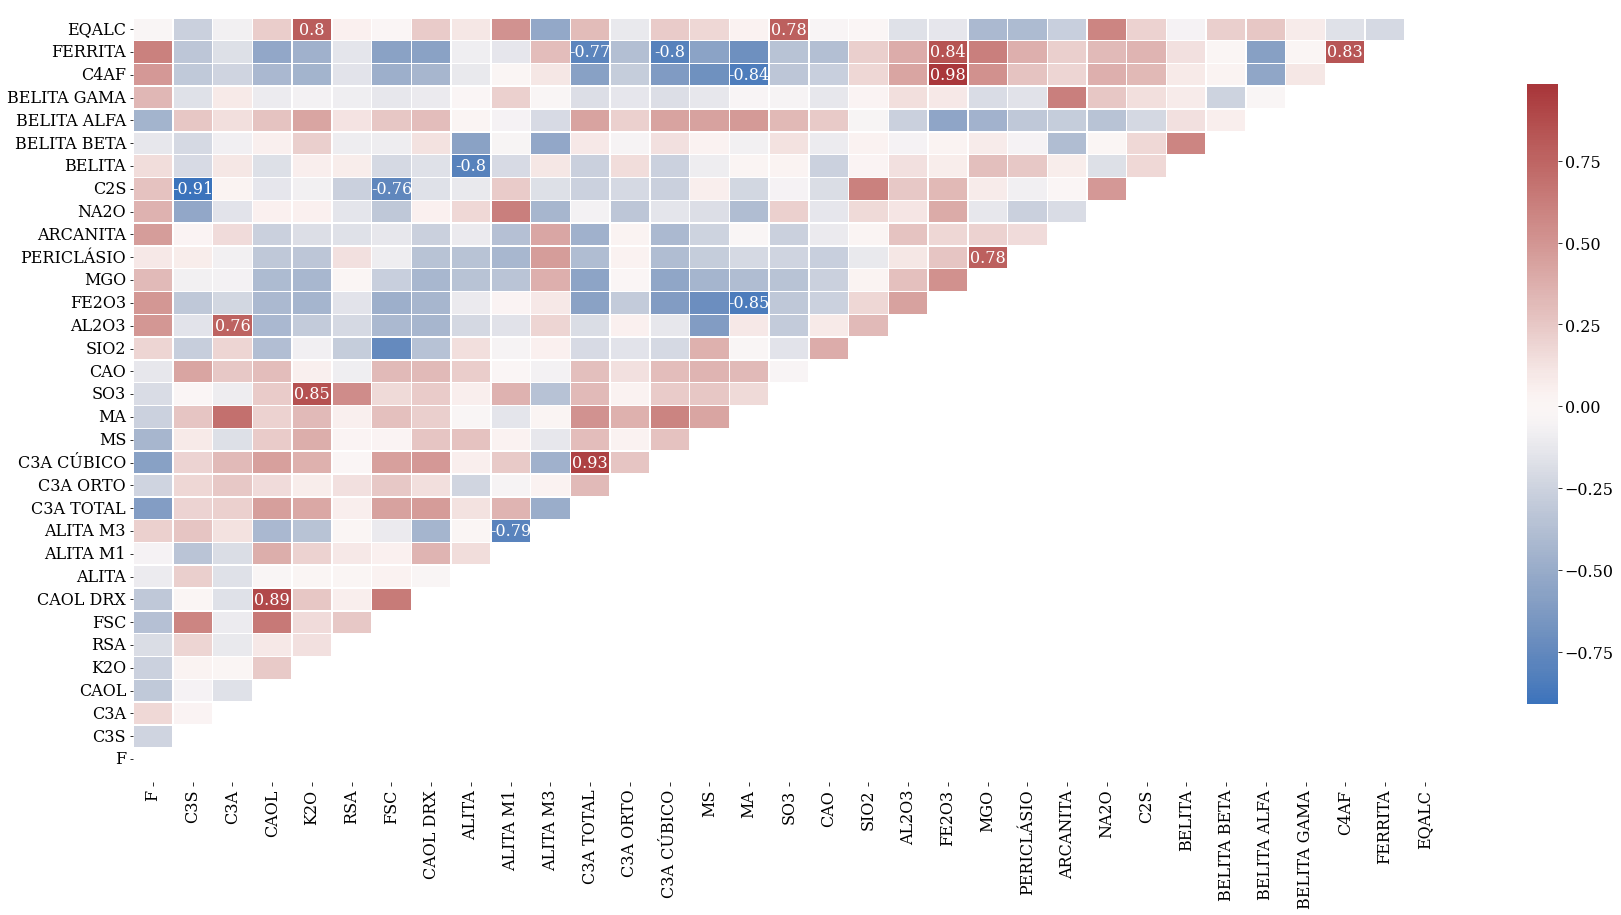

In [40]:
df_corr = df.corr(method="pearson")

labels = np.where(
    np.abs(df_corr) > 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 2), ""
)

plt.figure(figsize=(25, 13))

ax = sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .5, top-.5)

bottom, top = ax.get_xlim()
ax.set_ylim(bottom - .5, top+.5)

plt.tight_layout()

None

In [35]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    return None

In [36]:
corr_matrix = df.corr(method="pearson").abs()

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

sol[sol > 0.75]

FE2O3       C4AF          0.984849
C3A TOTAL   C3A CÚBICO    0.925799
C3S         C2S           0.911506
CAOL        CAOL DRX      0.889837
K2O         SO3           0.852977
MA          FE2O3         0.846766
            C4AF          0.839899
FE2O3       FERRITA       0.837727
C4AF        FERRITA       0.833398
ALITA       BELITA        0.803732
C3A CÚBICO  FERRITA       0.801043
K2O         EQALC         0.798289
ALITA M1    ALITA M3      0.793637
MGO         PERICLÁSIO    0.783197
SO3         EQALC         0.779260
C3A TOTAL   FERRITA       0.772010
FSC         C2S           0.756028
C3A         AL2O3         0.755935
dtype: float64

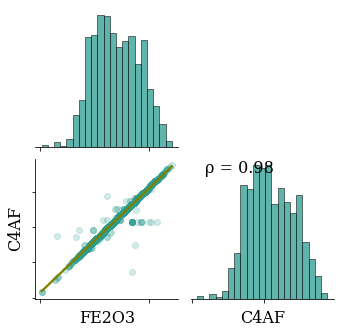

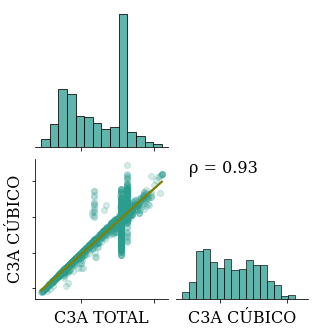

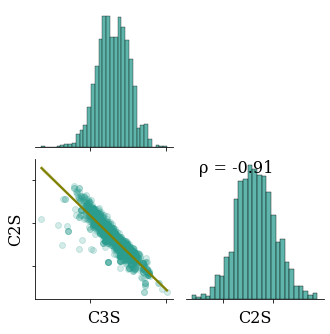

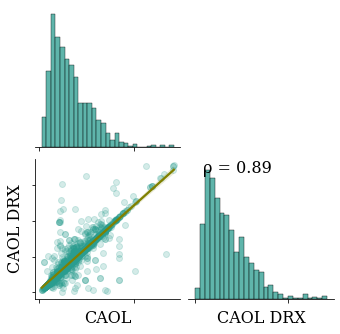

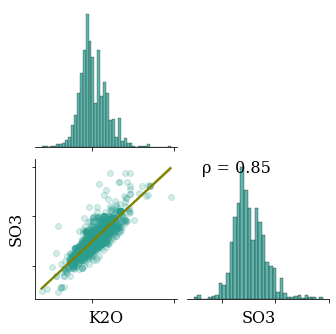

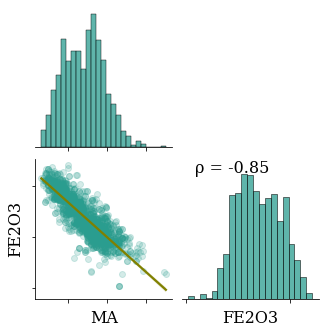

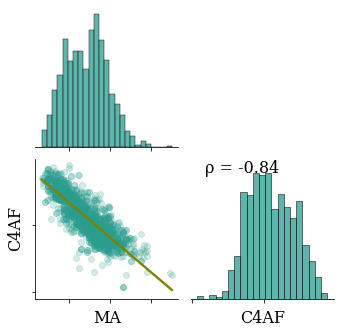

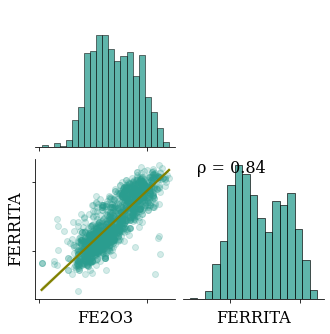

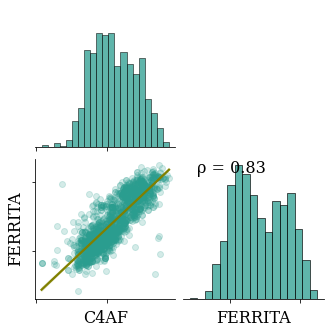

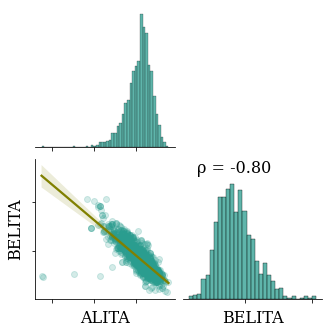

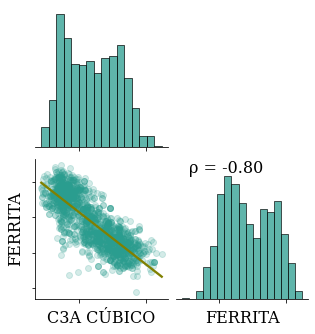

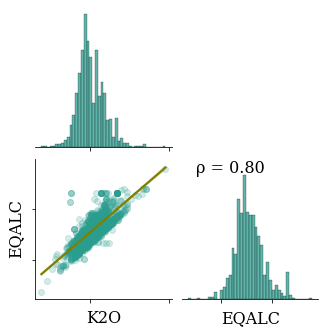

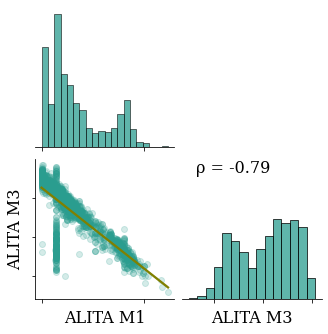

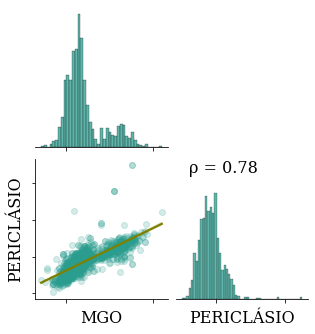

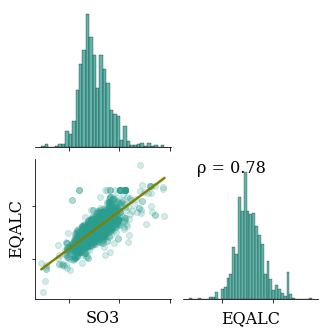

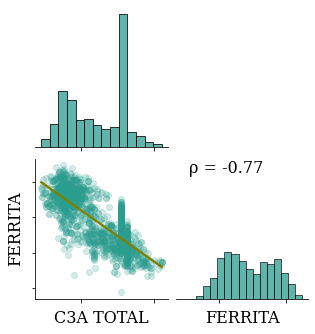

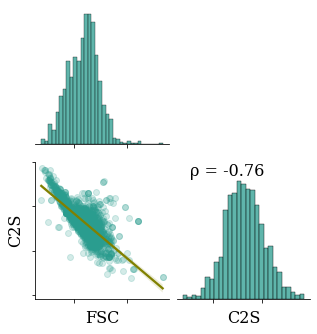

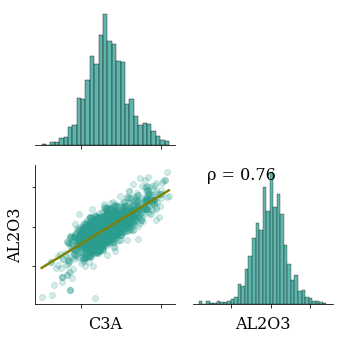

In [37]:
for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind='reg',
            plot_kws={
                'line_kws':{'color':'olive'},
                'scatter_kws': {'alpha': 0.2}
        })
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()